In [10]:
import numpy as np
import os as os
from datetime import datetime
from tensorflow.python.ops.control_flow_ops import case
from lcpae import LcpAe
from lcpgenerator import LcpGenerator
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.models import Model
from keras.models import load_model
import tensorflow as tf
import glob as glob
from PIL import Image


celldone = 'CELL run END'

In [20]:
ingress = layers.Input((1080, 1080, 2))
x = layers.Conv2D(filters=2, padding = 'same', kernel_size=(3,3), activation='relu')(ingress)
x = layers.Conv2D(filters=8, padding = 'same', kernel_size=(3,3), strides=(2,2), activation='relu')(ingress)
print(x.shape)
x = layers.Conv2D(filters=2, padding = 'same', kernel_size=(12,12), strides=(4,4), activation='relu')(x)
print(x.shape)
x = layers.Conv2D(filters=2, padding = 'same', kernel_size=(12,12), strides=(9,9), activation='relu')(x)
print(x.shape)

(None, 540, 540, 8)
(None, 135, 135, 2)
(None, 15, 15, 2)


In [2]:
encoder = load_model('/scratch-shared/david/model_data/CRAE_arch/exp147_epochs_60_D20213703_T153737encoderSegment')
loadpath = sorted(glob.glob('/scratch-shared/david/data/ki-database/exp147'+'/*'))
# encoder = load_model('/scratch-shared/david/model_data/CRAE_arch/exp143_epochs_60_D20211504_T181518encoderSegment')
# loadpath = sorted(glob.glob('/scratch-shared/david/data/ki-database/exp143'+'/*'))
# encoder = load_model('/scratch-shared/david/model_data/CRAE_arch/exp156_epochs_60_D20213908_T233910encoderSegment')
# loadpath = sorted(glob.glob('/scratch-shared/david/data/ki-database/exp156'+'/*'))
encoder.summary()
encoder.compile(optimizer='Adam', loss='mse')
# predGen = LcpGenerator(inpath='../data/ki-database/exp147', batch_size = 1, input_aug=False)
predArray = []
# loadpath = loadpath[3::4]
for i, inpath in enumerate(loadpath):
    npseq = np.load(inpath+'/sequence.npy').astype(float)
    npseq = npseq/65535
    npseq = np.reshape(npseq, (1, npseq.shape[0], npseq.shape[1], npseq.shape[2], npseq.shape[3]))
    nppred = encoder.predict(npseq)
    predArray += [nppred]
print(celldone)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 25, 1080, 1080, 6 0         
_________________________________________________________________
conv_timedist_layer (TimeDis (None, 25, 1050)          127506    
_________________________________________________________________
gru (GRU)                    (None, 25, 500)           2328000   
_________________________________________________________________
gru_1 (GRU)                  (None, 25, 250)           564000    
_________________________________________________________________
gru_2 (GRU)                  (None, 25, 100)           105600    
Total params: 3,125,106
Trainable params: 3,125,106
Non-trainable params: 0
_________________________________________________________________
CELL run END


In [3]:
t = range(25)
scatterDim = []
scatterList = []
for j in range(100):
    for i, featMap in enumerate(predArray):
        featMap = np.reshape(featMap, (25, 100))
        feat = featMap[:, j]
        scatterDim += [feat]
    scatterList += [scatterDim[:]]
    scatterDim = []
print(celldone)


    



        

        

    


CELL run END


In [5]:
fig = plt.figure()
for k, featVec in enumerate(scatterList):
    for feat in featVec:
        plt.plot(t, feat, 'o')
    # plt.show()
    plot_path = '/scratch-shared/david/model_data/' + 'exp147'
    plot_name =  '/feature_Number_' +str(k) + '.png'
    if not os.path.exists(plot_path):
        os.makedirs(plot_path)
    plt.savefig(plot_path + plot_name, format='png')
    plt.close()

print(celldone)


CELL run END


In [4]:
crae = load_model('/scratch-shared/david/model_data/CRAE_arch/exp147_epochs_60_D20213703_T153737full')
crae.summary()
predArray = []
loadpath = sorted(glob.glob('/scratch-shared/david/data/ki-database/exp147'+'/*'))
print(celldone)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 25, 1080, 1080, 6 0         
_________________________________________________________________
model_2 (Functional)         (None, 25, 100)           3125106   
_________________________________________________________________
model_3 (Functional)         (None, 25, 1080, 1080, 6) 2087448   
Total params: 5,212,554
Trainable params: 5,212,554
Non-trainable params: 0
_________________________________________________________________
CELL run END


In [ ]:

im1 = np.load(loadpath[5]+'/sequence.npy').astype(float)
im1 = im1/65535
im1 = np.reshape(im1, (1, im1.shape[0], im1.shape[1], im1.shape[2], im1.shape[3]))
# print(im1.shape)
im2 = crae.predict(im1)
im2 = im2.astype(float)
# im2 = im2*65535
# im2 = im2.astype(int)
# print('max', np.amax(im2))
# im2 = im2/np.amax(im2)
# print('min' ,np.amin(im2))
# print(im2.shape)
# print(im1.shape)
im1 = np.reshape(im1, (25, 1080, 1080, 6))
im2 = np.reshape(im2, (25, 1080, 1080, 6))
print(im1.shape, im2.shape)

frame1 = im1[10,:,:,4]
frame2 = im2[10,:,:,4]
# print(np.amax(frame2), np.amax(frame1))
# print('Max after norm' ,np.amax(frame2))
print(celldone)

(25, 1080, 1080, 6) (25, 1080, 1080, 6)
0.15882131457328796 0.27739375906004426
CELL run END


In [ ]:
type(frame2)
# image2 = Image.fromarray(frame2)
# image2.save('output.png', format='png')

TypeError: Cannot handle this data type: (1, 1), <i8

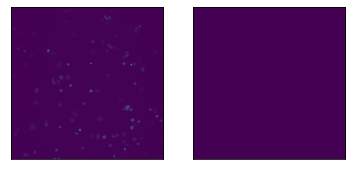

<class 'numpy.float64'>
0.1588212549686432 0.0
CELL run END


In [ ]:
ax = plt.subplot(1, 2, 1)
plt.imshow(frame1)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(1, 2, 2)
plt.imshow(frame2)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()
plt.close()
print(type(frame2[1][1]))
print(np.amax(frame2), np.amin(frame2))
print(celldone)

In [ ]:
npseq.shape[1]
t = range(npseq.shape[1])
print(len(t),npseq.shape[1], t[0]) 

25 25 0
